In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_path = r'C:\Users\palla\Downloads\Bank+Customer+Churn\Bank_Churn.csv'
df = pd.read_csv(my_path)
# df_world = pd.read_excel(my_path+'\\'+'WorldBank.xslx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
len(df['Geography'].unique())

3

In [5]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df_new = df[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]
df_new.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


#### Frequency distribution

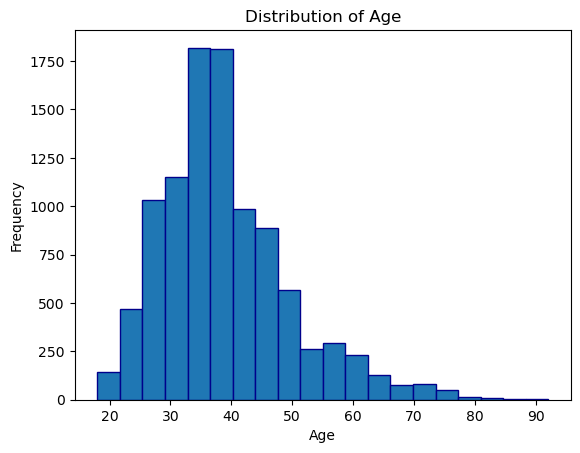

In [173]:
plt.hist(df['Age'], bins=20,edgecolor='darkblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

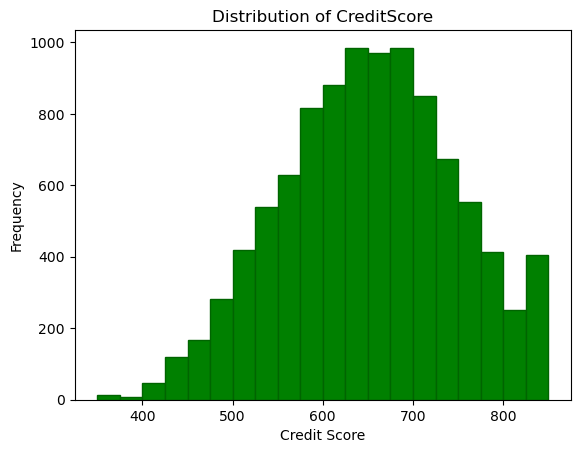

In [175]:
plt.hist(df['CreditScore'], bins=20, color='green',edgecolor='darkgreen')
plt.title('Distribution of CreditScore')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

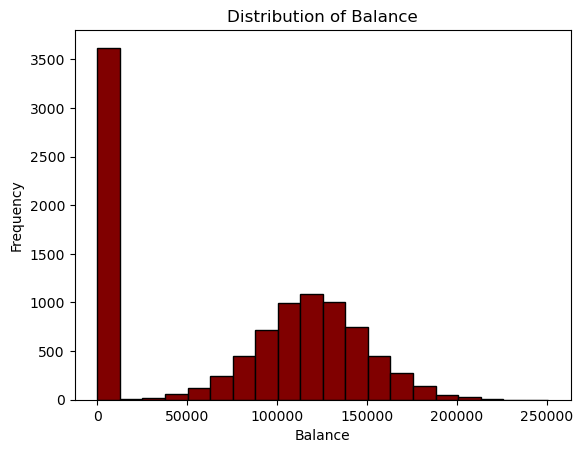

In [179]:
plt.hist(df['Balance'], bins=20, color='maroon',edgecolor='black')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

In [67]:
total_churn = df[df['Exited']==1].shape[0]
total_customers = df.shape[0]
churn_rate = total_churn/total_customers *100

#### Categorical analysis

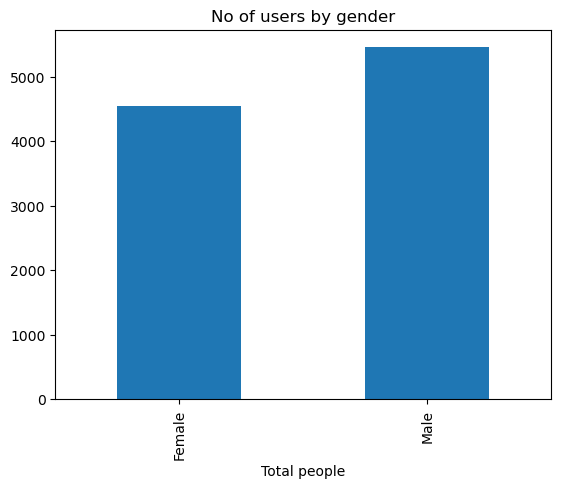

In [11]:
gender.plot(kind = 'bar')
plt.xlabel('Gender')
plt.xlabel('Total people')
plt.title('No of users by gender')
plt.show()

In [12]:
geography = df.groupby('Geography')['CustomerId'].count()

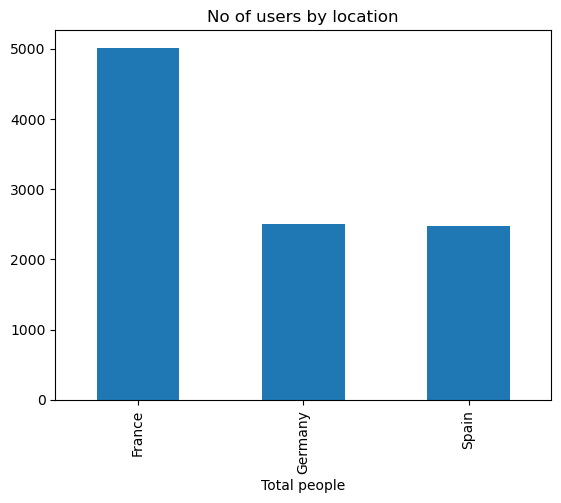

In [13]:
geography.plot(kind ='bar')
plt.xlabel('Location')
plt.xlabel('Total people')
plt.title('No of users by location')
plt.show()

In [32]:
gender_by_geography = df.groupby(['Geography','Gender'])['CustomerId'].count().unstack()

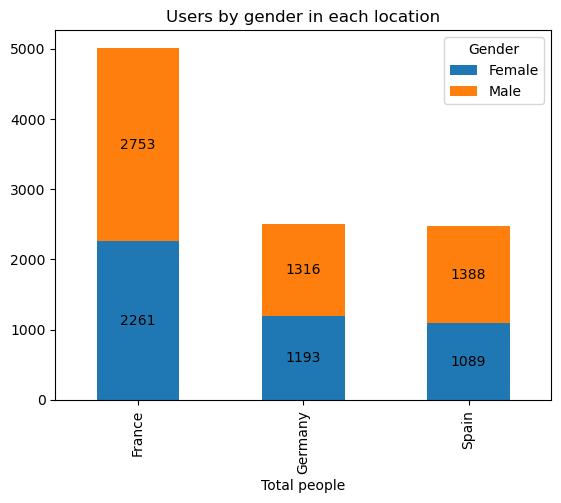

In [34]:
ax = gender_by_geography.plot(kind='bar',stacked =True)
for container in ax.containers:
    ax.bar_label(container,label_type='center')
plt.xlabel('Location')
plt.xlabel('Total people')
plt.title('Users by gender in each location')
plt.show()

In [38]:
has_card = df.groupby('HasCrCard')['CustomerId'].count()

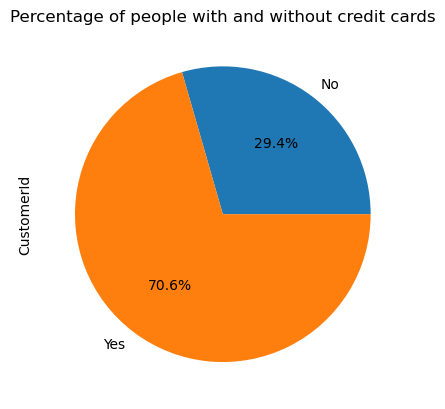

In [40]:
labels = ['No','Yes']
has_card.plot(kind='pie', labels =labels,autopct='%.1f%%')
plt.title('Percentage of people with and without credit cards')
plt.show()

In [42]:
card_by_gender = df.groupby(['HasCrCard','Gender']).count()['CustomerId'].unstack()

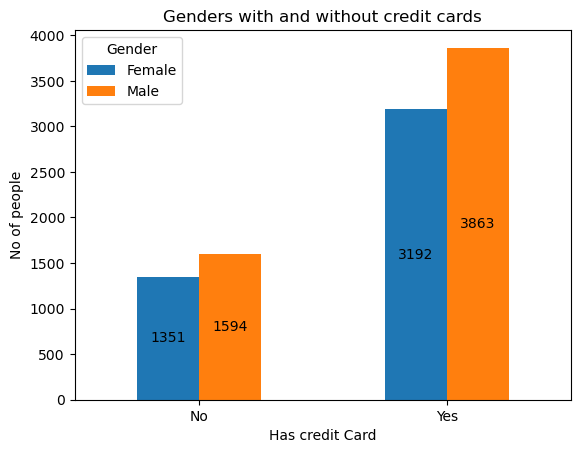

In [44]:
ax = card_by_gender.plot(kind='bar',xlabel = 'Has credit Card',ylabel='No of people')
ax.set_xticklabels(labels,rotation = 'horizontal')
for container in ax.containers:
    ax.bar_label(container,label_type='center')

plt.title('Genders with and without credit cards')
plt.show()

#### Churn Analysis

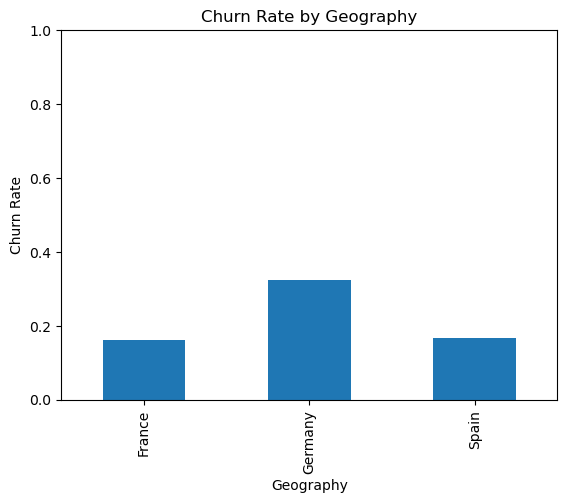

In [127]:
churn_by_geo = df.groupby('Geography')['Exited'].mean()
churn_by_geo.plot(kind='bar')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.xlabel('Geography')
plt.ylim(0, 1)
plt.show()

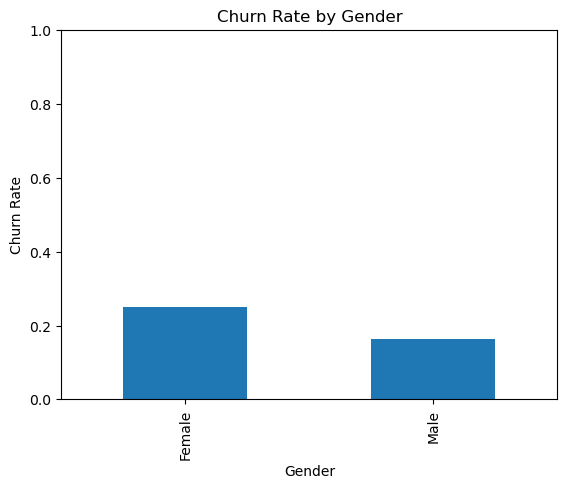

In [129]:
churn_by_gender = df.groupby('Gender')['Exited'].mean()
churn_by_gender.plot(kind ='bar')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

C:\Users\palla\AppData\Local\Temp\ipykernel_14272\2152856211.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age_group = df.groupby('AgeGroup')['Exited'].mean()


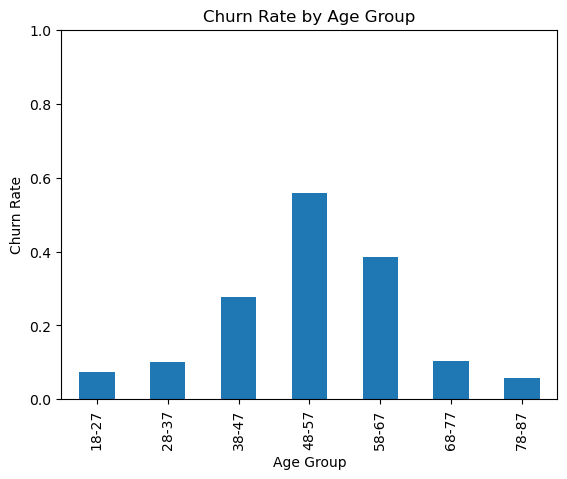

In [131]:
min_value = df['Age'].min()
max_value = df['Age'].max()
bin_width = 10
bins = np.arange(min_value,max_value,bin_width)
labels = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)
churn_by_age_group = df.groupby('AgeGroup')['Exited'].mean()
churn_by_age_group.plot(kind='bar')
plt.title('Churn Rate by Age Group')
plt.ylabel('Churn Rate')
plt.xlabel('Age Group')
plt.ylim(0, 1)
plt.show()

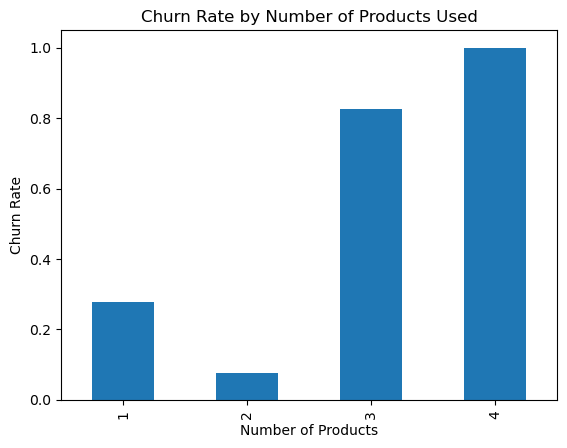

In [171]:
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean()
churn_by_products.plot(kind = 'bar')
plt.title('Churn Rate by Number of Products Used')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()

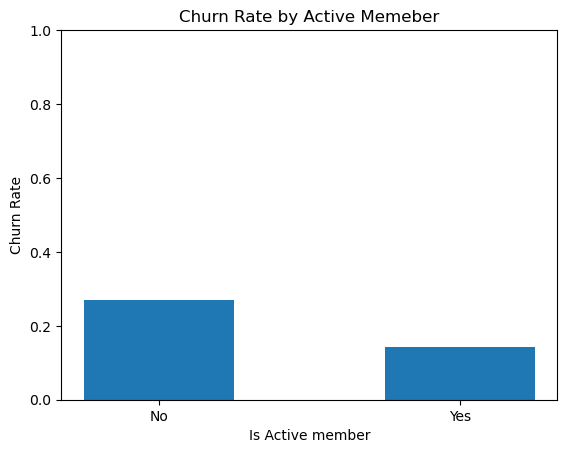

In [223]:
churn_by_active = df.groupby('IsActiveMember')['Exited'].mean()
labels = ['No','Yes']
plt.bar(labels , churn_by_active,width =0.5)
plt.title('Churn Rate by Active Memeber')
plt.xlabel('Is Active member')
plt.ylabel('Churn Rate')
plt.ylim(0,1)
plt.show()

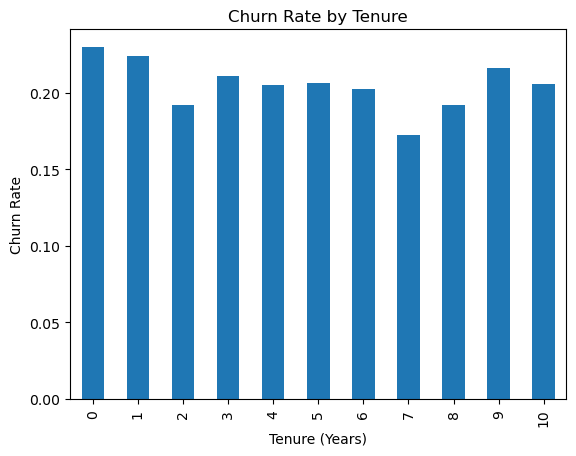

In [252]:
tenure_churn = df.groupby('Tenure')['Exited'].mean()
tenure_churn.plot(kind ='bar')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Churn Rate')
plt.show()

C:\Users\palla\AppData\Local\Temp\ipykernel_14272\2132146869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_churn = df.groupby('SalarySegment')['Exited'].mean()


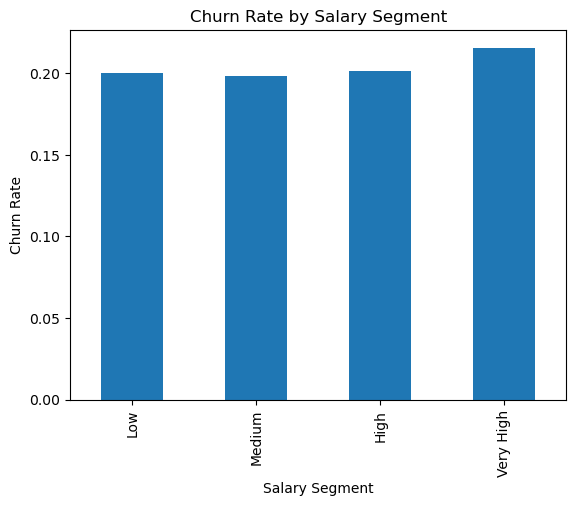

In [294]:
df['SalarySegment'] = pd.qcut(df['EstimatedSalary'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
salary_churn = df.groupby('SalarySegment')['Exited'].mean()
salary_churn.plot(kind ='bar')
plt.title('Churn Rate by Salary Segment')
plt.xlabel('Salary Segment')
plt.ylabel('Churn Rate')
plt.show()